In [57]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('./Social_Network_Ads (1).csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
df = df.drop(columns=['User ID', 'Gender'], axis=1)

In [60]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [61]:
df.shape

(400, 3)

Text(0, 0.5, 'Age')

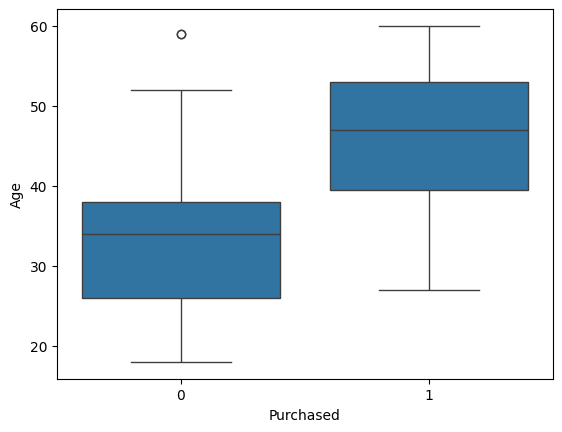

In [62]:
sns.boxplot( x=df['Purchased'], y=df['Age'] )
plt.xlabel( 'Purchased' )
plt.ylabel( 'Age' )

In [63]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

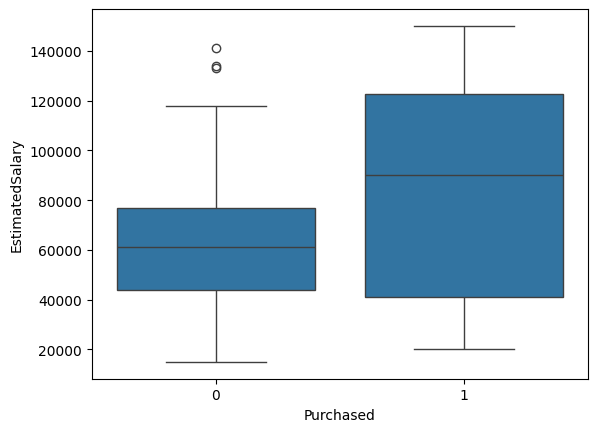

In [64]:
sns.boxplot( x=df['Purchased'], y=df['EstimatedSalary'] )

In [65]:
X = df.drop(columns=['Purchased'], axis=1)
y = df['Purchased']

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Define Base Models**

In [68]:
base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]


## **Define Meta Model**
#### Meta model decides how to cmbine predictions

In [69]:
meta_model = LogisticRegression()

## **Build stacking classifier**

In [70]:
from sklearn.model_selection import KFold

classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

classifier.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('lr', ...), ('dt', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",LogisticRegression()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",KFold(n_split... shuffle=True)
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



In [73]:
print('Confusion Matrix: \n', confusion_matrix( y_test, y_pred ))

Confusion Matrix: 
 [[47  5]
 [ 3 25]]


<Axes: >

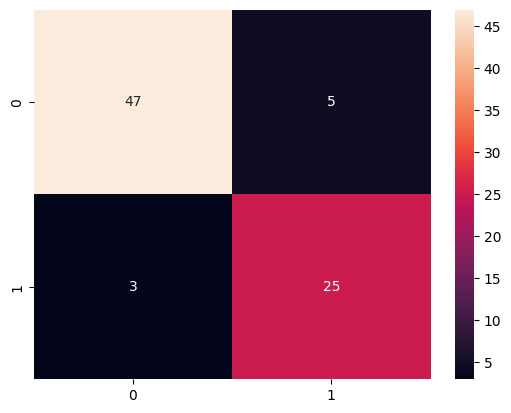

In [78]:
sns.heatmap( confusion_matrix( y_test, y_pred ), annot=True )